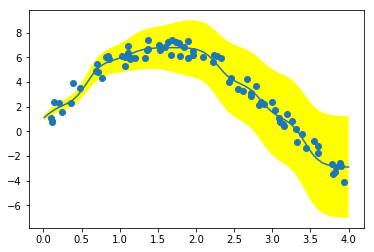

In [54]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import linalg

#分開X,y
df = pd.read_csv('1_data.csv')
x = df.drop(['t'], axis=1)
x2 = df.drop(['t'], axis=1)
y = df.drop(['x'], axis=1)
φ = df.drop(['t','x'], axis=1)

#求出basic function
for j in range(0,7):
    s = 0.1
    M = 7
    uj = (4*j)/M
    for i in range (0,100):
        
        x2.iloc[i,0] = 1/(1+math.exp((uj-x.iloc[i,0])/s))
    φ=pd.concat([φ,x2],axis=1)

    
#分別把N設成 10,15,30,80
φ = φ.iloc[0:80]
y = y.iloc[0:80]
xx = x.iloc[0:80]


#第一小題求出Mn跟Sn
φ_transpose = np.transpose(φ)
SNinv = np.dot(φ_transpose,φ)
I = 0.000001*np.identity(7)
SNinv = I + SNinv
SN = np.linalg.inv(SNinv)
MN = np.dot(SN,φ_transpose)
MN = np.dot(MN,y)
MN = np.asarray(MN).ravel()



#5個curve samples
A1 = np.random.multivariate_normal(MN, SN,1)
A1 = np.transpose(A1)

A2 = np.random.multivariate_normal(MN, SN,1)
A2 = np.transpose(A2)

A3 = np.random.multivariate_normal(MN, SN,1)
A3 = np.transpose(A3)

A4 = np.random.multivariate_normal(MN, SN,1)
A4 = np.transpose(A4)

A5 = np.random.multivariate_normal(MN, SN,1)
A5 = np.transpose(A5)




#求function值的函數
def my_function(x,w):
    test = []
    for j in range(0,7):
        s = 0.1
        M = 7
        uj = (4*j)/M
        aa = 1/(1+math.exp((uj-x)/s))
        test.append(aa)
    value = np.dot(test,w)
    return value


#求standard deviation
stand = []
for i in range (0,7):
    stand.append(math.sqrt(SN[i,i]))
maxMN = MN+stand
minMN = MN-stand




#畫圖
testx = []
test1 = []
test2 = []
test3 = []
test4 = []
test5 = []
maxx = []
minn = []
mean = []
x = 0
for i in range (0,400):
    x = x+0.01
    testx.append(x)
    test1.append(my_function(x,A1))
    test2.append(my_function(x,A2))
    test3.append(my_function(x,A3))
    test4.append(my_function(x,A4))
    test5.append(my_function(x,A5))
    maxx.append(my_function(x,maxMN))
    minn.append(my_function(x,minMN))
    mean.append(my_function(x,MN))






plt.fill_between(testx, maxx, minn,facecolor = "yellow")
plt.plot(testx,mean)
plt.scatter(xx,y)